In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv')
data.sample(5)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
829,5337-IIWKZ,Male,0,Yes,Yes,34,No,No,DSL,No,...,Yes,Yes,Yes,No,Monthly,Yes,Manual,44.85,1442.6,No
471,3583-EKAPL,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,Yes,Monthly,Yes,Manual,55.00,55,Yes
2069,6356-ELRKD,Female,0,No,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Monthly,Yes,Manual,95.60,95.6,Yes
1778,6181-AXXYF,Male,0,Yes,Yes,72,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Credit card (automatic),24.75,1859.1,No
619,4059-IIEBK,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Bank transfer (automatic),78.55,522.95,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print(data.duplicated().sum())

0


In [ ]:
data.keys()

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data = data.replace([np.inf, -np.inf], np.nan).dropna()

In [ ]:
data.drop('customerID', axis = 1, inplace = True)
data.dtypes

,0
Gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
Tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
data.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [ ]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
data.TotalCharges.value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
6849.4,1
692.35,1
130.15,1


In [ ]:
data[pd.to_numeric(data.TotalCharges, errors = 'coerce').isnull()]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Manual,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Manual,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Manual,25.75,,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Manual,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Manual,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Manual,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Manual,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Manual,73.35,,No


In [ ]:
data.iloc[488]['TotalCharges']

' '

In [ ]:
data = data[data.TotalCharges != ' ']
data.shape

(7032, 20)

In [ ]:
data.TotalCharges = pd.to_numeric(data.TotalCharges)

In [ ]:
data['TotalCharges'].dtypes

dtype('float64')

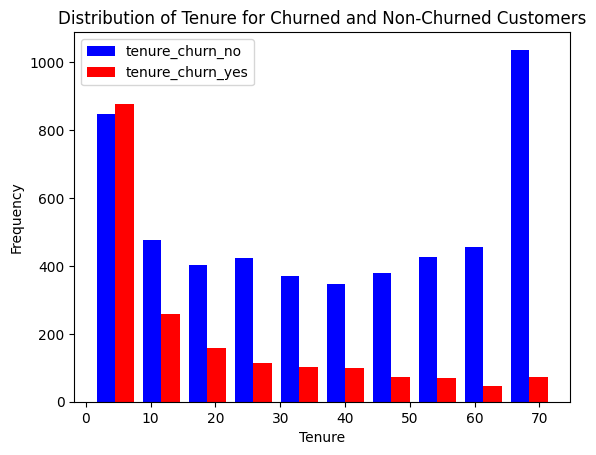

In [ ]:
tenure_churn_no = data[data.Churn == 'No'].Tenure
tenure_churn_yes = data[data.Churn == 'Yes'].Tenure

plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure for Churned and Non-Churned Customers')
plt.hist([tenure_churn_no, tenure_churn_yes], color = ['blue', 'red'], label = ['tenure_churn_no', 'tenure_churn_yes'])
plt.legend(loc = 'upper left')
plt.show()

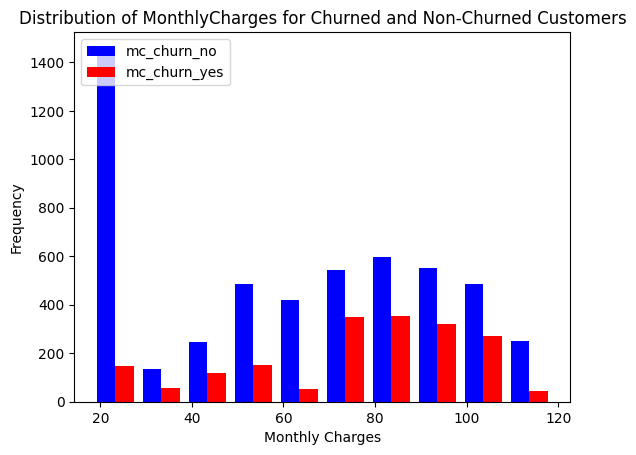

In [ ]:
mc_churn_no = data[data.Churn == 'No'].MonthlyCharges
mc_churn_yes = data[data.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of MonthlyCharges for Churned and Non-Churned Customers')
plt.hist([mc_churn_no, mc_churn_yes], color = ['blue', 'red'], label = ['mc_churn_no', 'mc_churn_yes'])
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
for col in data.columns[data.dtypes == 'object']:
    print(f"{col}: unique values = {data[col].unique()}, value counts = \n{data[col].value_counts()}\n")

Gender: unique values = ['Female' 'Male'], value counts = 
Gender
Male      3549
Female    3483
Name: count, dtype: int64

Partner: unique values = ['Yes' 'No'], value counts = 
Partner
No     3639
Yes    3393
Name: count, dtype: int64

Dependents: unique values = ['No' 'Yes'], value counts = 
Dependents
No     4933
Yes    2099
Name: count, dtype: int64

PhoneService: unique values = ['No' 'Yes'], value counts = 
PhoneService
Yes    6352
No      680
Name: count, dtype: int64

MultipleLines: unique values = ['No' 'Yes'], value counts = 
MultipleLines
No     4065
Yes    2967
Name: count, dtype: int64

InternetService: unique values = ['DSL' 'Fiber optic' 'No'], value counts = 
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

OnlineSecurity: unique values = ['No' 'Yes'], value counts = 
OnlineSecurity
No     5017
Yes    2015
Name: count, dtype: int64

OnlineBackup: unique values = ['Yes' 'No'], value counts = 
OnlineBackup
No     4607


### Encoding of the data

In [ ]:
yes_no_columns = ['Partner',	'Dependents',	'PhoneService',	'OnlineSecurity', 'MultipleLines', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV',
                  'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no_columns:
  data[col].replace({'Yes':1, 'No': 0}, inplace = True)

data['Gender'].replace({'Male': 1, 'Female' : 0}, inplace = True)


<ipython-input-24-6598f82c6e70>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace({'Yes':1, 'No': 0}, inplace = True)
<ipython-input-24-6598f82c6e70>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col].replace({'Yes':1, 'No': 0}, inplace = True)
<ipython-input-24-6598f82c6e70

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoded_columns = ['InternetService', 'Contract', 'PaymentMethod']

encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' can be used to avoid dummy variable trap

encoded_array = encoder.fit_transform(data[encoded_columns])

encoded_data = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(encoded_columns))

data = pd.concat([data.drop(columns=encoded_columns), encoded_data], axis=1)

In [ ]:
data = data.dropna()
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Manual
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,29.85,29.85,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,1.0,0.0,1.0,...,0.0,56.95,1889.50,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,...,1.0,53.85,108.15,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,45.0,0.0,0.0,1.0,0.0,1.0,...,0.0,42.30,1840.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,1.0,70.70,151.65,1.0,1.0,0.0,0.0,0.0,0.0,1.0


### Scaling of 'Tenure', 'MonthlyCharges', 'TotalCharges' columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_scale = ['Tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()

data[columns_scale] = scaler.fit_transform(data[columns_scale])

<ipython-input-30-c7502a716ed1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_scale] = scaler.fit_transform(data[columns_scale])


### Splitting and resampling of the data

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = data.drop('Churn', axis = 1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled.shape, y_train_resampled.shape

((8188, 22), (8188,))

### Tensorflow Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(20, input_shape = (22,), activation = 'relu'),
    Dense(12, activation = 'relu'),
    Dense(1, activation = 'sigmoid')]
)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 20)                  │             460 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 12)                  │             252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 725 (2.83 KB)

 Trainable params: 725 (2.83 KB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [ ]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train_resampled, y_train_resampled, epochs = 50, validation_data=(X_test, y_test))

Epoch 1/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8178 - loss: 0.4083 - val_accuracy: 0.7338 - val_loss: 0.5373
Epoch 2/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8257 - loss: 0.3944 - val_accuracy: 0.7068 - val_loss: 0.5890
Epoch 3/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8208 - loss: 0.4055 - val_accuracy: 0.7495 - val_loss: 0.5264
Epoch 4/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8187 - loss: 0.4054 - val_accuracy: 0.7431 - val_loss: 0.5346
Epoch 5/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8197 - loss: 0.4059 - val_accuracy: 0.7267 - val_loss: 0.5492
Epoch 6/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8257 - loss: 0.4030 - val_accuracy: 0.7452 - val_loss: 0.5250
Epoch 7/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8233 - loss: 0.4048 - val_accuracy: 0.7224 - val_loss: 0.5535
Epoch 8/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8208 - loss: 0.4058 - val_accuracy: 0.

In [ ]:
model.evaluate(X_train_resampled, y_train_resampled)

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8163 - loss: 0.4091


[0.37276536226272583, 0.8385441899299622]

In [ ]:
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred[:8]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.8220461 ],
       [0.54640234],
       [0.01398514],
       [0.47511393],
       [0.40047216],
       [0.23182851],
       [0.01977652],
       [0.05868009]], dtype=float32)

### Classification report and confusion matrix

Confusion Matrix:
[[779 282]
 [102 242]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.73      0.80      1061
         1.0       0.46      0.70      0.56       344

    accuracy                           0.73      1405
   macro avg       0.67      0.72      0.68      1405
weighted avg       0.78      0.73      0.74      1405



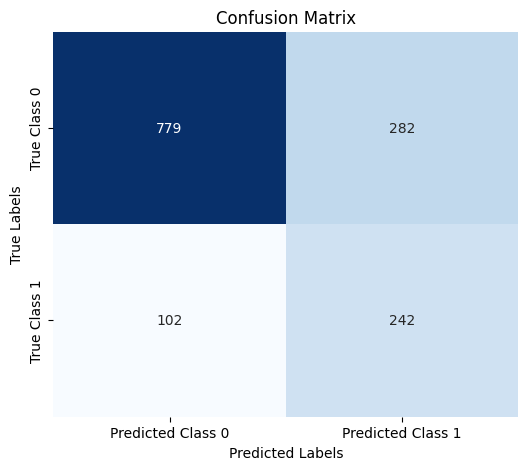

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Generate confusion matrix
conf_matrix = tf.math.confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:")
print(conf_matrix.numpy())


print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix.numpy(), annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['True Class 0', 'True Class 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
